In [ ]:
from tensorflow.keras.applications import EfficientNetB0
# from cloud_tpu_client import Client
# c = Client()
# c.configure_tpu_version(tf.__version__, restart_type="always")

import tensorflow as tf

#make brightness changes
from google.colab import drive

drive.mount('/content/drive/')


MessageError: ignored

In [ ]:
import tensorflow as tf

tf.test.gpu_device_name()


'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13352440581699124830
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14308773384686039535
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
!ls "drive/MyDrive/Datasets/"


AB.zip	CNR-EXT-Patches-150x150.zip  test_data.zip  traindata.zip  val_data.zip


In [ ]:
print("Tensorflow version " + tf.__version__)
import os
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers

Tensorflow version 2.6.0


In [ ]:
from zipfile import ZipFile

train_file = 'drive/MyDrive/Datasets/traindata.zip'
test_file = 'drive/MyDrive/Datasets/test_data.zip'

with ZipFile(train_file, 'r') as zip:
  zip.extractall("train_data")
  
train_dir = os.path.join(os.path.dirname("train_data"), 'train_data')
data_dir = pathlib.Path(train_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

free = list(data_dir.glob('free/*'))
# PIL.Image.open(str(free[2]))

94493


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64 #64 cuz apparently needs to be 8? 

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=(1./127.5)-1,
    validation_split=0.2,
    # rotation_range=40,
    brightness_range=(0.4,1.6),
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE),
    subset='training',
    # class_mode='binary'
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE),
    subset='validation',
    # class_mode='binary'
    class_mode='categorical'
) 

Found 75595 images belonging to 2 classes.
Found 18898 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


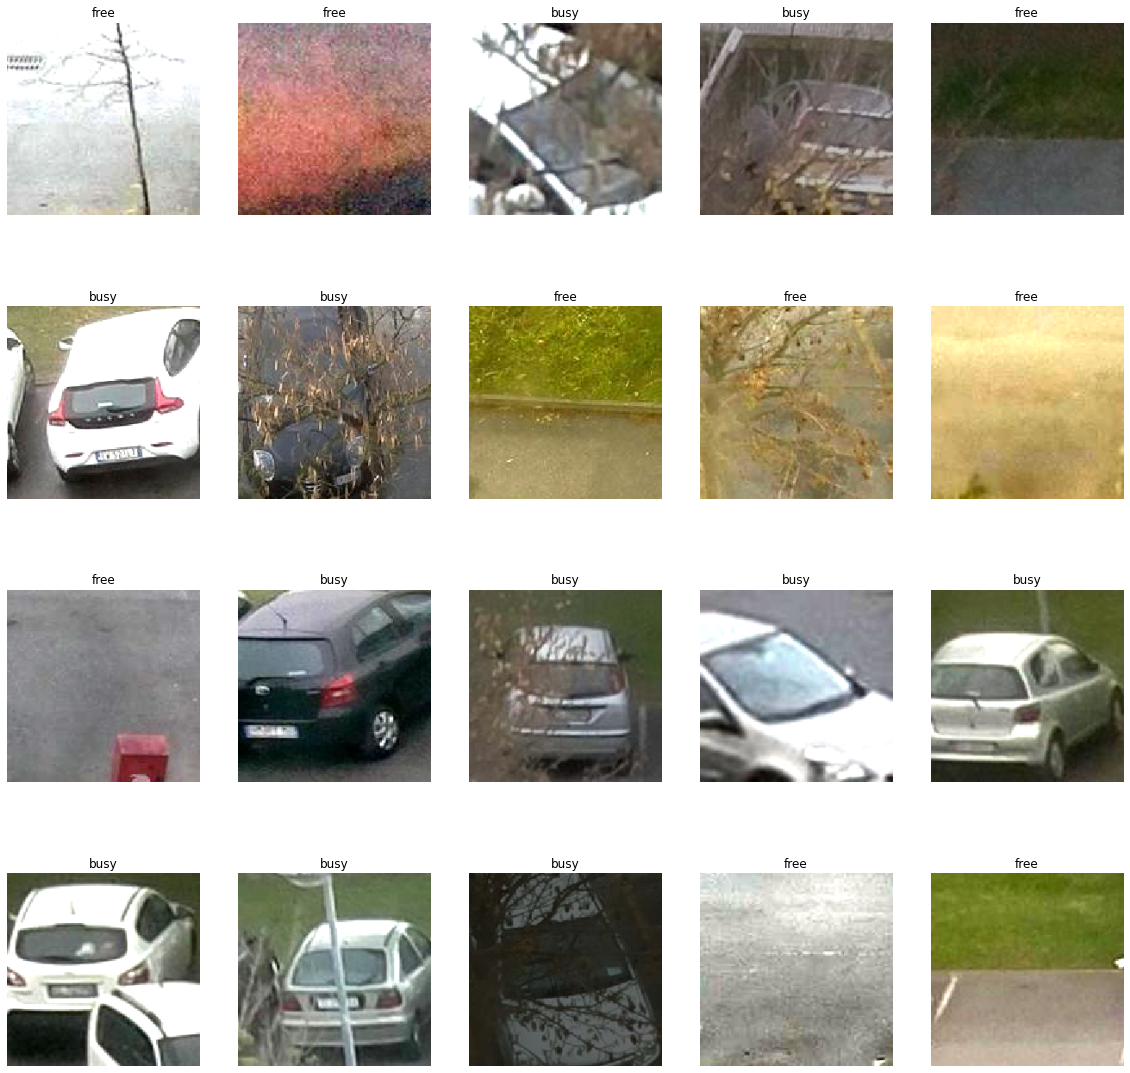

In [ ]:
image_batch, label_batch = next(val_generator)
image_batch.shape, label_batch.shape

class_names = sorted(train_generator.class_indices.keys())
# print(label_batch)


plt.figure(figsize=(20, 20))
for images in image_batch:
  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(image_batch[i]/255)
    plt.title(class_names[label_batch[i][1].astype("uint8")])
    plt.axis("off")


In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('lot_labels.txt', 'w') as f:
  f.write(labels)

{'busy': 0, 'free': 1}


In [ ]:
import tensorflow_hub as hub
IMAGE_SHAPE = (224,244)
def build_model(num_classes=2):
  inputs = layers.Input(shape=(224,224,3))
  model = tf.keras.applications.MobileNetV3Small(include_top=False,minimalistic=True, input_tensor=inputs, weights="imagenet") 
  #image input needs to be between [0-255] else [-1,1] if inlcude_preprocessing is False 
  
  model.trainable = False
  x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
  # x = layers.BatchNormalization()(x)

  top_dropout_rate = 0.2
  x = layers.Dropout(rate=top_dropout_rate)(x)
  outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)


  model = tf.keras.Model(inputs, outputs, name="MobileNetV3Large")
  # optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
  # optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
  model.compile(
      optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
  )
  return model


# model = build_model(2)

In [ ]:
model = 

In [ ]:
checkpoint_path = "weights.{epoch:02d}-{val_loss:.2f}.hdf5"                             
cp_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_path, verbose=1, save_weights_only=True,
        period=1)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4, restore_best_weights=True)

rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 1, factor= 0.4, min_lr= 1e-15, verbose=1)


In [ ]:
!pip install git+https://github.com/sebastian-sz/efficientnet-lite-keras@main

In [ ]:
epochs = 5  
# from efficientnet_lite import EfficientNetLiteB0

# backbone = EfficientNetLiteB0(
#    weights='imagenet', 
#    input_shape=(224,224, 3),
#    include_top=False
# )
n_classes = 2
# efnb0 = tf.keras.models.Mobilenet(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), classes=2)

# model = tf.keras.models.Sequential() 
# model.add(backbone)
# model.add(tf.keras.layers.GlobalAveragePooling2D())
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
model = build_model(2) #prob this was done RIP

# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
model.load_weights('./final_weights.hdf5')

In [ ]:


history = model.fit(
        train_generator,
        epochs=epochs,
        # steps_per_epoch=len(train_generator), #steps_per_epoch,
        validation_data=val_generator,
        # validation_steps= len(val_generator),#validation_steps,
        callbacks=[early_stop, rlrop,cp_callback]
    )

Epoch 1/5
1182/1182 [==============================] - 311s 261ms/step - loss: 0.1887 - accuracy: 0.9304 - val_loss: 0.0667 - val_accuracy: 0.9790

Epoch 00001: saving model to weights.01-0.07.hdf5
Epoch 2/5
1182/1182 [==============================] - 302s 256ms/step - loss: 0.0773 - accuracy: 0.9740 - val_loss: 0.0481 - val_accuracy: 0.9838

Epoch 00002: saving model to weights.02-0.05.hdf5
Epoch 3/5
1182/1182 [==============================] - 300s 254ms/step - loss: 0.0657 - accuracy: 0.9774 - val_loss: 0.0418 - val_accuracy: 0.9861

Epoch 00003: saving model to weights.03-0.04.hdf5
Epoch 4/5
1182/1182 [==============================] - 298s 253ms/step - loss: 0.0584 - accuracy: 0.9798 - val_loss: 0.0386 - val_accuracy: 0.9872

Epoch 00004: saving model to weights.04-0.04.hdf5
Epoch 5/5
1182/1182 [==============================] - 288s 244ms/step - loss: 0.0553 - accuracy: 0.9810 - val_loss: 0.0365 - val_accuracy: 0.9875

Epoch 00005: saving model to weights.05-0.04.hdf5


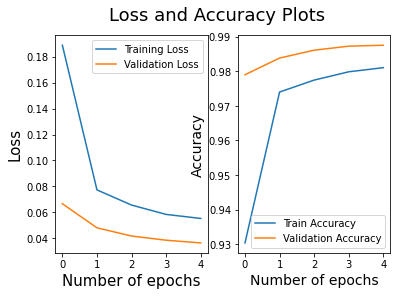

In [ ]:
def plot_hist(hist):
    # plt.plot(hist.history["accuracy"])
    # plt.plot(hist.history["val_accuracy"])
    # plt.title("model accuracy")
    # plt.ylabel("accuracy")
    # plt.xlabel("epoch")
    # plt.legend(["train", "validation"], loc="upper left")
    # plt.show()
    # plt.figure(figsize=(18,8))

    plt.suptitle('Loss and Accuracy Plots', fontsize=18)

    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Number of epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)

    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Number of epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.show()

plot_hist(history)

In [ ]:
model.save_weights('./mobilenetv3_base_train.hdf5')

# Eval on test set

In [ ]:
test_file = 'drive/MyDrive/Datasets/test_data.zip'

with ZipFile(train_file, 'r') as zip:
  zip.extractall("test_dir")
  
test_dir = os.path.join(os.path.dirname("train_data"), 'test_dir')
data_dir = pathlib.Path(test_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

94493


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64 #64 cuz apparently needs to be 8? 

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
    validation_split=0.2,
    # rotation_range=40,
    # brightness_range=(0.4,1.6),
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode="nearest",
)

test_gen = datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE),
    # subset='training',
    # class_mode='binary'
    class_mode='categorical'
)

Found 94493 images belonging to 2 classes.


In [ ]:
model.evaluate(test_gen)

1477/1477 [==============================] - 148s 100ms/step - loss: 0.0571 - accuracy: 0.9801


[0.057085566222667694, 0.980093777179718]

# MORE TRAINING!

In [ ]:
model.trainable = True
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

for layer in model.layers:
  if isinstance(layer, keras.layers.BatchNormalization):
      layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



NameError: ignored

In [ ]:
model.summary()

In [ ]:
history = model.fit(
        train_generator,
        epochs=5,
        # steps_per_epoch=len(train_generator), #steps_per_epoch,
        validation_data=val_generator,
        # validation_steps= len(val_generator),#validation_steps,
        callbacks=[early_stop, rlrop,cp_callback]
    )

Epoch 1/5
1182/1182 [==============================] - 299s 253ms/step - loss: 0.0382 - accuracy: 0.9873 - val_loss: 0.0244 - val_accuracy: 0.9920

Epoch 00001: saving model to weights.01-0.02.hdf5
Epoch 2/5
1182/1182 [==============================] - 296s 251ms/step - loss: 0.0365 - accuracy: 0.9876 - val_loss: 0.0238 - val_accuracy: 0.9926

Epoch 00002: saving model to weights.02-0.02.hdf5
Epoch 3/5
1182/1182 [==============================] - 293s 248ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.0233 - val_accuracy: 0.9925

Epoch 00003: saving model to weights.03-0.02.hdf5
Epoch 4/5
1182/1182 [==============================] - 292s 247ms/step - loss: 0.0336 - accuracy: 0.9884 - val_loss: 0.0228 - val_accuracy: 0.9924

Epoch 00004: saving model to weights.04-0.02.hdf5
Epoch 5/5
1182/1182 [==============================] - 291s 247ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0225 - val_accuracy: 0.9925

Epoch 00005: saving model to weights.05-0.02.hdf5


In [ ]:
model.save_weights('./mobilenetv3_small.hdf5')

In [ ]:
## Retraining
model.trainable = True
fine_tune_at = 140

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-7),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(
        train_generator,
        epochs=5,
        # steps_per_epoch=len(train_generator), #steps_per_epoch,
        validation_data=val_generator,
        # validation_steps= len(val_generator),#validation_steps,
        callbacks=[early_stop, rlrop,cp_callback]
    )

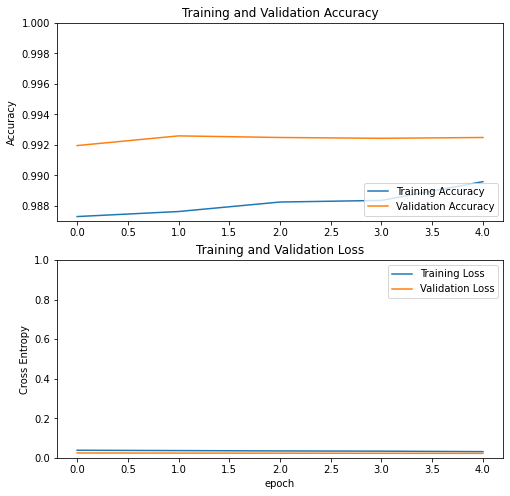

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save
with open("mobilenetv3.tflite", "wb") as file:
  file.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpy9zao__t/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files(train_dir + '/*/*')
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    # image = tf.cast(image / 255., tf.float32) #no for mobilenetv3
    # print(image.shape)
    image = tf.expand_dims(image, 0)
    # print(image.shape)
    yield [image]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input and output tensors to uint8 (added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()

with open('mobilenetv3_small2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpi9r7gu5y/assets


INFO:tensorflow:Assets written to: /tmp/tmpi9r7gu5y/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
batch_images, batch_labels = next(val_generator)

logits = model(batch_images)
prediction = np.argmax(logits, axis=1)
truth = np.argmax(batch_labels, axis=1)

keras_accuracy = tf.keras.metrics.Accuracy()
keras_accuracy(prediction, truth)

print("Raw model accuracy: {:.3%}".format(keras_accuracy.result()))

# model2 = build_model(2)
# model2.load_weights('mobil.hdf5')
# logits = model2(batch_images)
# prediction = np.argmax(logits, axis=1)
# truth = np.argmax(batch_labels, axis=1)

# keras_accuracy = tf.keras.metrics.Accuracy()
# keras_accuracy(prediction, truth)

print("Raw model accuracy: {:.3%}".format(keras_accuracy.result()))

Raw model accuracy: 100.000%
Raw model accuracy: 100.000%


In [ ]:
batch_images, batch_labels = next(val_generator)
def set_input_tensor(interpreter, input):
  input_details = interpreter.get_input_details()[0]
  tensor_index = input_details['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  # Inputs for the TFLite model must be uint8, so we quantize our input data.
  # NOTE: This step is necessary only because we're receiving input data from
  # ImageDataGenerator, which rescaled all image data to float [0,1]. When using
  # bitmap inputs, they're already uint8 [0,255] so this can be replaced with:
  input_tensor[:, :] = input
  # scale, zero_point = input_details['quantization']
  # input_tensor[:, :] = np.uint8(input / scale + zero_point)

def classify_image(interpreter, input,c):
  set_input_tensor(interpreter, input)
  interpreter.invoke()
  output_details = interpreter.get_output_details()[0]
  output = interpreter.get_tensor(output_details['index'])
  # Outputs from the TFLite model are uint8, so we dequantize the results:
  scale, zero_point = output_details['quantization']
  output = scale * (output - zero_point)
  # print(output)
  # print(batch_truth[c])
  top_1 = np.argmax(output)
  return top_1

interpreter = tf.lite.Interpreter('mobilenetv3_small2.tflite')
interpreter.allocate_tensors()

# Collect all inference predictions in a list
batch_prediction = []
batch_truth = np.argmax(batch_labels, axis=1)

c=0

for i in range(len(batch_images)):
  prediction = classify_image(interpreter, batch_images[i],c)
  c=c+1
  batch_prediction.append(prediction)

# Compare all predictions to the ground truth
tflite_accuracy = tf.keras.metrics.Accuracy()
tflite_accuracy(batch_prediction, batch_truth)
print("Quant TF Lite accuracy: {:.3%}".format(tflite_accuracy.result()))


Quant TF Lite accuracy: 96.875%


In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler	

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0  68567      0 --:--:-- --:--:-- --:--:-- 68567
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/r

In [ ]:
! edgetpu_compiler mobilenetv3_small.tflite
! edgetpu_compiler mobilenetv3_small2.tflite


Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 618 ms.

Input model: mobilenetv3_small.tflite
Input size: 1.18MiB
Output model: mobilenetv3_small_edgetpu.tflite
Output size: 1.33MiB
On-chip memory used for caching model parameters: 1.25MiB
On-chip memory remaining for caching model parameters: 6.47MiB
Off-chip memory used for streaming uncached model parameters: 64.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 53
Operation log: mobilenetv3_small_edgetpu.log
See the operation log file for individual operation details.
Compilation child process completed within timeout period.
Compilation succeeded! 
Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 611 ms.

Input model: mobilenetv3_small2.tflite
Input size: 1.18MiB
Output model: mobilenetv3_small2_edgetpu.tflite
Output size: 1.33MiB
On-chip memory used for caching mode

In [ ]:
from google.colab import files

files.download('mobilenetv3_small.tflite')
files.download('mobilenetv3_small_edgetpu.tflite')
files.download('mobilenetv3_small2.tflite')
files.download('mobilenetv3_small2_edgetpu.tflite')
# files.download('lot_labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# model.save('efficientnet_untuned')
model.save_weights("cifar_efficientnetb0_weights.h5")

# Load the tpu ver of the efficentnet n train it

In [ ]:
# def unfreeze_model(model):
#     # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
#     for layer in model.layers[-24:]:
#         if not isinstance(layer, layers.BatchNormalization):
#             layer.trainable = True

#     optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
#     model.compile(
#         optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
#     )


# unfreeze_model(model)

# epochs = 10

# history = model.fit(
#         train_generator,
#         epochs=epochs,
#         steps_per_epoch=len(train_generator), #steps_per_epoch,
#         validation_data=val_generator,
#         validation_steps= len(val_generator),#validation_steps,
#         callbacks=[cp_callback]
#     )

In [ ]:
# model.save('efficientnet_v1')

In [ ]:

def plot_hist(hist):
    # plt.plot(hist.history["accuracy"])
    # plt.plot(hist.history["val_accuracy"])
    # plt.title("model accuracy")
    # plt.ylabel("accuracy")
    # plt.xlabel("epoch")
    # plt.legend(["train", "validation"], loc="upper left")
    # plt.show()
    # plt.figure(figsize=(18,8))

    plt.suptitle('Loss and Accuracy Plots', fontsize=18)

    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.xlabel('Number of epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)

    plt.subplot(1,2,2)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Number of epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.show()

plot_hist(history)